In [8]:
# Importing the necessary libraries
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Df1 = pd.read_csv("train.csv")
Df2 = pd.read_csv("train_syn.csv")
df1 = pd.read_csv("dev_in.csv")
df2 = pd.read_csv("dev_in_syn.csv")

Df = pd.concat([Df1, Df2], axis=0)
Df = Df.reset_index(drop=True)
df = pd.concat([df1, df2], axis=0)
df = df.reset_index(drop=True)

X_train = Df.drop('power',axis=1)
y_train = Df['power']
X_test = df.drop('power',axis=1)
y_test = df['power']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053896 entries, 0 to 1053895
Data columns (total 11 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   draft_aft_telegram           1053896 non-null  float64
 1   draft_fore_telegram          1053896 non-null  float64
 2   stw                          1053896 non-null  float64
 3   diff_speed_overground        1053896 non-null  float64
 4   awind_vcomp_provider         1053896 non-null  float64
 5   awind_ucomp_provider         1053896 non-null  float64
 6   rcurrent_vcomp               1053896 non-null  float64
 7   rcurrent_ucomp               1053896 non-null  float64
 8   comb_wind_swell_wave_height  1053896 non-null  float64
 9   timeSinceDryDock             1053896 non-null  float64
 10  time_id                      1053896 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 88.4 MB


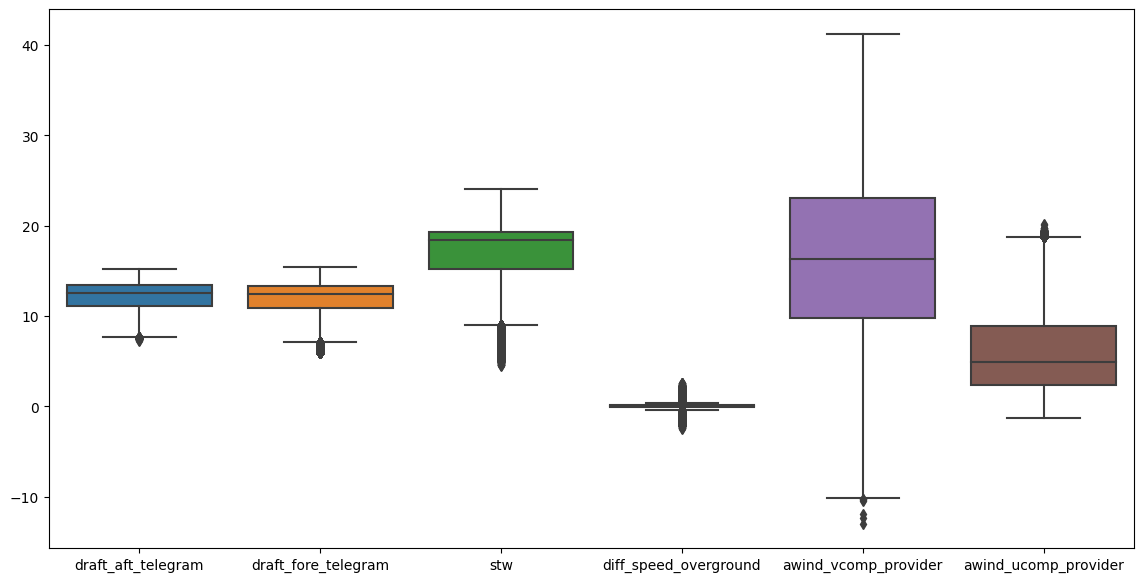

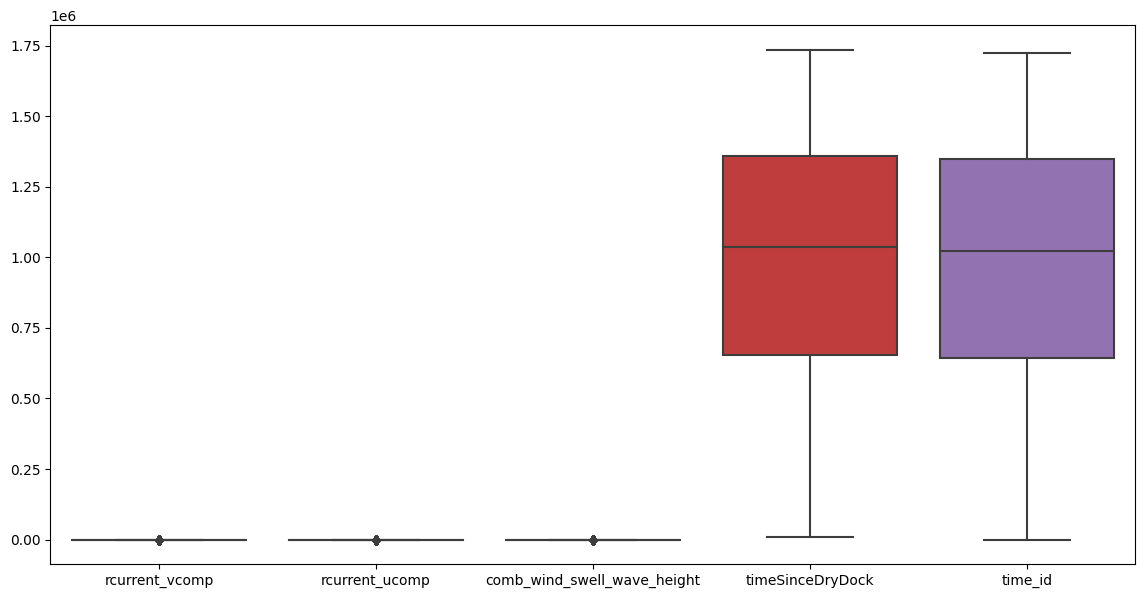

In [9]:
#PLotting the box plot.
plt.figure(figsize=(14,7))
sns.boxplot(data=X_train.iloc[:,0:6])
plt.show()
plt.figure(figsize=(14,7))
sns.boxplot(data=X_train.iloc[:,6:12])
plt.show()

In [10]:
from sklearn.preprocessing import RobustScaler as RS
features_names=[i for i in X_train.columns] 
scaler=RS()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(data=X_train, columns=features_names)
X_test=scaler.fit_transform(X_test)
X_test=pd.DataFrame(data=X_test, columns=features_names)

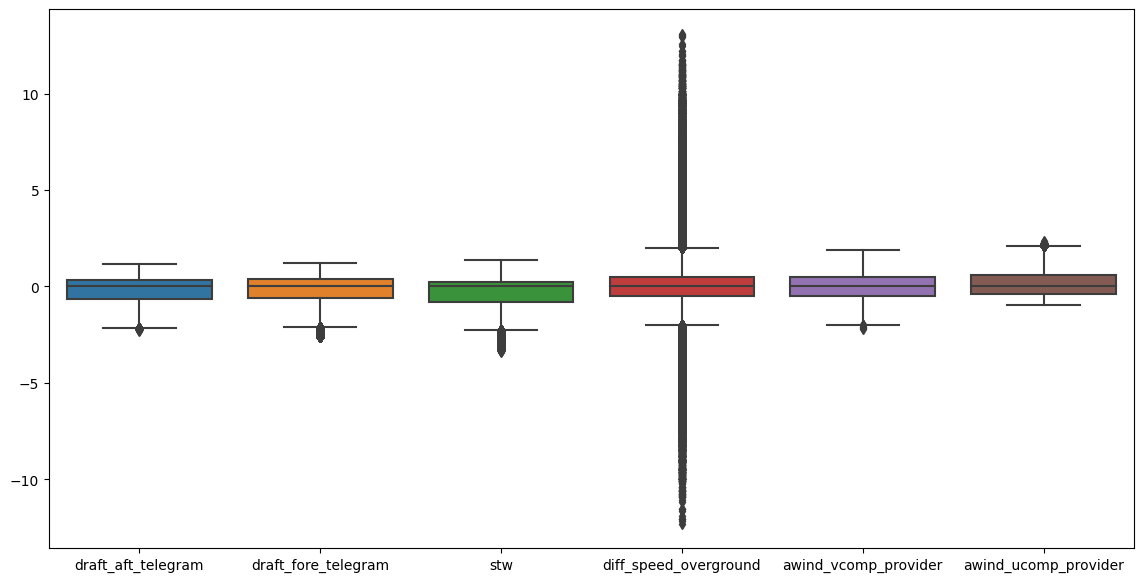

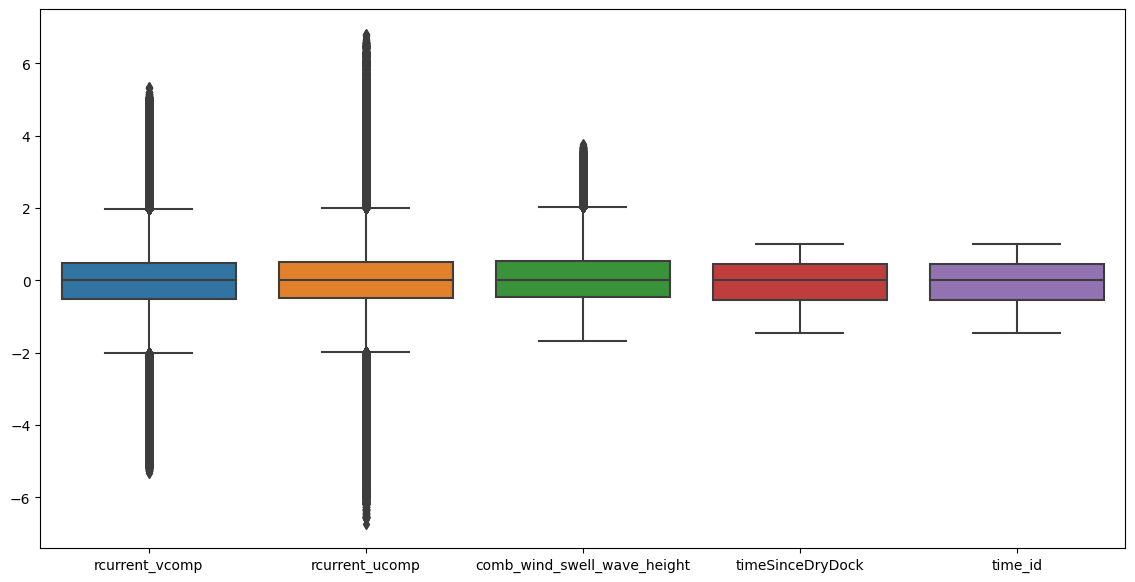

In [11]:
#PLotting the box plot.
plt.figure(figsize=(14,7))
sns.boxplot(data=X_train.iloc[:,0:6])
plt.show()
plt.figure(figsize=(14,7))
sns.boxplot(data=X_train.iloc[:,6:12])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
xtraining,xvalid,ytraining,yvalid = train_test_split(X_train,y_train,test_size=0.5)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create the individual regression models
degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_p = poly_features.fit_transform(xtraining)
X_test_p= poly_features.fit_transform(xvalid)
x_test_pt= poly_features.fit_transform(X_test)


In [14]:
model1 = LinearRegression()
model2 = RandomForestRegressor(criterion='friedman_mse', max_features= None,random_state=42,verbose=3)
model3 = MLPRegressor(activation='relu', solver='adam', learning_rate='adaptive',random_state=42,verbose=3)
model4 = DecisionTreeRegressor(criterion='squared_error',splitter='best')

# Split the dataset into training and testing sets  
model1.fit(X_train_p,ytraining)
model2.fit(xtraining,ytraining)
model3.fit(xtraining,ytraining)
model4.fit(xtraining,ytraining)

#making predictions for the validation data
preds1 = model1.predict(X_test_p)
preds2 = model2.predict(xvalid)
preds3 = model3.predict(xvalid)
preds4 = model4.predict(xvalid)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   34.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 29.5min finished


Iteration 1, loss = 203352105.31282195
Iteration 2, loss = 146657394.25795862
Iteration 3, loss = 85284074.65648977
Iteration 4, loss = 43697479.98138656
Iteration 5, loss = 20308056.63318465
Iteration 6, loss = 10317301.82000387
Iteration 7, loss = 6412273.81949249
Iteration 8, loss = 4300737.85806955
Iteration 9, loss = 3115319.61091711
Iteration 10, loss = 2522826.74729049
Iteration 11, loss = 2242381.11144700
Iteration 12, loss = 2099065.58758839
Iteration 13, loss = 2013083.74223805
Iteration 14, loss = 1953500.16420012
Iteration 15, loss = 1908809.35763457
Iteration 16, loss = 1873753.36069691
Iteration 17, loss = 1845290.60159412
Iteration 18, loss = 1821951.40136301
Iteration 19, loss = 1802281.62678829
Iteration 20, loss = 1785481.30164756
Iteration 21, loss = 1770892.14256303
Iteration 22, loss = 1758465.41823307
Iteration 23, loss = 1747720.56641656
Iteration 24, loss = 1738080.95491225
Iteration 25, loss = 1729330.02427310
Iteration 26, loss = 1721228.96918318
Iteration 27,

C:\Users\venna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.1s finished


In [15]:

#making predictions for the test data
test_preds1 = model1.predict(x_test_pt)
test_preds2 = model2.predict(X_test)
test_preds3 = model3.predict(X_test)
test_preds4 = model4.predict(X_test)

#making a new dataset for training our final model by stacking the predictions on the validation data
train_stack = np.column_stack((preds1,preds2,preds3,preds4))
np.save('train_stack',train_stack)
np.save('yvalid',yvalid)
#making the final test set for our final model by stacking the predictions on the test data
test_stack = np.column_stack((test_preds1,test_preds2,test_preds3,test_preds4))

final_model =  RandomForestRegressor(criterion='friedman_mse', max_features= None,random_state=42,verbose=3)

#training the final model on the stacked predictions
final_model.fit(train_stack,yvalid)
final_predictions = final_model.predict(test_stack)
tr_s = final_model.score(train_stack,yvalid)
t_s = final_model.score(test_stack,y_test)
np.save('ensemble',final_predictions)
# Evaluate the performance of the voting regressor
mse_voting = mean_squared_error(y_test, final_predictions)


print("Mean Squared Error (Voting Regressor):", mse_voting)


r2_voting = r2_score(y_test, final_predictions)
print('R-squared Score (Voting Regressor):',r2_voting)

# Evaluate the performance of the voting regressor
rmse_voting = mean_squared_error(y_test, final_predictions, squared=False)

print("Root Mean Squared Error (Voting Regressor):", rmse_voting)

# Calculate the mean absolute error (MAE)
mae_voting = mean_absolute_error(y_test, final_predictions)
print("Mean Absolute Error (Voting Regressor):", mae_voting)

mape_final = np.mean(np.abs((y_test - final_predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE) (Final Model):",mape_final)

print(t_s)
print(tr_s)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.2s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Mean Squared Error (Voting Regressor): 2977409.2555981507
R-squared Score (Voting Regressor): 0.9560681000549938
Root Mean Squared Error (Voting Regressor): 1725.5170980312396
Mean Absolute Error (Voting Regressor): 1161.8365725089989
Mean Absolute Percentage Error (MAPE) (Final Model): 7.93091490587659


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


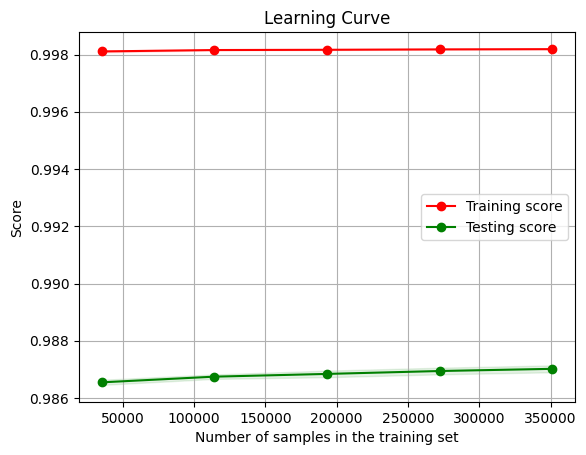

In [16]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(criterion='friedman_mse', max_features= None,random_state=42,verbose=3),train_stack, yvalid, cv=3, scoring='r2', n_jobs=-1)
# Calculate mean and standard deviation for train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
np.save('train_sizes',train_sizes)
np.save('train_scores',train_scores)
np.save('test_scores',test_scores)
# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Score")
plt.grid()

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(
    train_sizes,
    train_scores_mean,
    "o-",
    color="r",
    label="Training score",
)
plt.plot(
    train_sizes,
    test_scores_mean,
    "o-",
    color="g",
    label="Testing score",
)

plt.legend(loc="best")